In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,RandomOverSampler  
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score,auc, roc_auc_score, accuracy_score,roc_curve,average_precision_score, classification_report,precision_recall_curve
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv',encoding="utf-8",low_memory=False )
print("The shape of :", data.shape)

The shape of : (284807, 31)


In [18]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

scaler = StandardScaler()

In [19]:
X = data.drop('Class', axis=1)
Y = data['Class']
X = scaler.fit_transform(X)
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
X = scaler.fit_transform(X)

In [21]:
# Split train into train-test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split

print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('Class', axis=1)
y = data['Class']

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [23]:
# Split train into train-test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
print("The shape of : x_test,y_test,x_train,y_train ",X_test.shape,y_test.shape,X_train.shape,y_train.shape)

The shape of : x_test,y_test,x_train,y_train  (56962, 30) (56962,) (227845, 30) (227845,)


###LogisiticRegression Model :

              precision    recall  f1-score   support

           0   0.999244  0.999384  0.999314     56864
           1   0.611111  0.561224  0.585106        98

    accuracy                       0.998631     56962
   macro avg   0.805178  0.780304  0.792210     56962
weighted avg   0.998576  0.998631  0.998602     56962

0.998990541815708
0.9986306660580738
Specificity :  0.5612244897959183


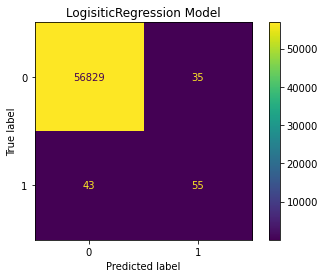

The shape of : (284807, 31)


In [25]:
# Train the LogisiticRegression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred1,digits=6))

# Check scores
print (logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred1, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(logreg, X_test, y_test)  
plt.title('LogisiticRegression Model')
plt.show()
print("The shape of :", data.shape)

###DecisionTree Model :

              precision    recall  f1-score   support

           0   0.999455  0.999824  0.999640     56864
           1   0.870130  0.683673  0.765714        98

    accuracy                       0.999280     56962
   macro avg   0.934792  0.841749  0.882677     56962
weighted avg   0.999233  0.999280  0.999237     56962

0.9993504356031513
0.9992802219023208
Specificity :  0.6836734693877551


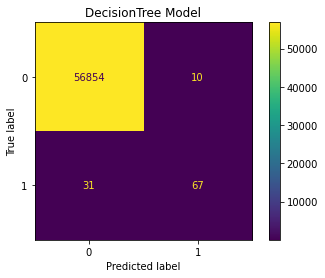

In [26]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred2,digits=6))

# Check scores
print (clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred2, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(clf, X_test, y_test)  
plt.title('DecisionTree Model')
plt.show()

###KNearest Model :


              precision    recall  f1-score   support

           0   0.998437  1.000000  0.999218     56864
           1   1.000000  0.091837  0.168224        98

    accuracy                       0.998438     56962
   macro avg   0.999219  0.545918  0.583721     56962
weighted avg   0.998440  0.998438  0.997788     56962

0.9986438148741469
0.9984375548611355
Specificity :  0.09183673469387756


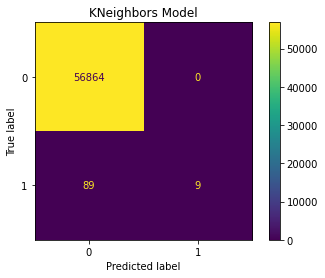

In [27]:
# Train KNeighbors Classifer
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred3,digits=6))

# Check scores
print (knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred3, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('KNeighbors Model')
plt.show()